In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)
from tqdm import tqdm
from pprint import pprint
tqdm.pandas()
df = pd.read_csv("applications.csv")
df.Community_URL__c = "https://connect.pharmac.govt.nz" + df.Community_URL__c
df

,Id,Name,Applications__c,Brand_Name__c,Chemical_Name__c,Applicants__c,Funding_requested_for__c,Stage__c,Pharmaceutical__c,Community_URL__c,Therapeutic_group__c
0,a0ROZ000009J5Ev2AK,15-valent pneumococcal conjugate vaccine (PCV15),A-04423,VAXNEUVANCE.,15-valent pneumococcal conjugate vaccine (PCV15),MERCK SHARP & DOHME (NEW ZEALAND) LIMITED,Prevention of invasive pneumococcal disease,Decision,15-valent pneumococcal conjugate vaccine (PCV1...,https://connect.pharmac.govt.nz/apptracker/s/a...,NaN
1,a0ROZ000004CX2l2AG,Adjuvanted inactivated quadrivalent influenza ...,A-03341,FLUAD® QUAD,Adjuvanted inactivated quadrivalent influenza ...,Seqirus,influenza vaccination for people aged 65 years...,Decision,Adjuvanted inactivated quadrivalent influenza ...,https://connect.pharmac.govt.nz/apptracker/s/a...,National Immunisation Schedule
2,a0ROZ00000Cn1xE2AR,Adjuvanted inactivated trivalent influenza vac...,A-00724,Fluad,Adjuvanted inactivated trivalent influenza vac...,Seqirus,Influenza vaccine for people 65 years of age a...,Options Compared,Adjuvanted inactivated trivalent influenza vac...,https://connect.pharmac.govt.nz/apptracker/s/a...,National Immunisation Schedule
3,a0R2P000000gVYDUA2,Bevacizumab and Human Papillomavirus (HPV) vac...,A-00655,NaN,Bevacizumab and Human Papillomavirus (HPV) vac...,PHARMAC Initiated,Recurrent respiratory papillomatosis,Decision,Bevacizumab and Human Papillomavirus (HPV) vac...,https://connect.pharmac.govt.nz/apptracker/s/a...,Respiratory System and Allergies
4,a0R2P000000LmcWUAS,Diphtheria and tetanus vaccine,A-00221,NaN,Diphtheria and tetanus vaccine,PHARMAC Initiated,Widening of access,Decision,Diphtheria and tetanus vaccine,https://connect.pharmac.govt.nz/apptracker/s/a...,National Immunisation Schedule
...,...,...,...,...,...,...,...,...,...,...,...
2010,a0ROZ00000083aG2AQ,AEON Sodium Chloride 5 Percent,A-04432,AEON,AEON Sodium Chloride 5 Percent,MEDIX 21 LIMITED,Corneal oedema relief,Seeking Clinical Advice,AEON Sodium Chloride 5 Percent (AEON),https://connect.pharmac.govt.nz/apptracker/s/a...,NaN
2011,a0ROZ00000DqVYD2A3,Pegunigalsidase alfa-iwxj,A-05325,ELFABRIO,Pegunigalsidase alfa-iwxj,CHIESI NEW ZEALAND LIMITED,Fabry Disease,Options Compared,Pegunigalsidase alfa-iwxj (ELFABRIO),https://connect.pharmac.govt.nz/apptracker/s/a...,NaN
2012,a0ROZ000003nufF2AQ,Elemental Food (Elemental Gold),A-04296,It is not a pharmaceutical. The brand name is ...,Elemental Food (Elemental Gold),ENDOTHERAPEUTICS NZ LIMITED,Currently funded indications,Seeking Clinical Advice,Elemental Food (Elemental Gold) (It is not a p...,https://connect.pharmac.govt.nz/apptracker/s/a...,NaN
2013,a0ROZ00000AQkoE2AT,SARS-CoV-2 rS (Omicron XBB.1.5),A-04785,NUVAXOVID XBB.1.5,SARS-CoV-2 rS (Omicron XBB.1.5),BIOCELECT NEW ZEALAND LIMITED,prevention of COVID-19,Options Compared,SARS-CoV-2 rS (Omicron XBB.1.5) (NUVAXOVID XBB...,https://connect.pharmac.govt.nz/apptracker/s/a...,NaN


In [2]:
events = pd.read_json(f"applications/{df['Id'].iloc[0]}.json")
events

,text,position,name,last,events,dateString,collapsed,checked
0,<p>New funding applications are referred to on...,0,Application Received,False,"[{'Summary': {'s': None, 'fs': None, 'change':...",Aug 2022,False,True
1,<p>Pharmac is identifying and gathering inform...,1,Seeking Clinical Advice,False,"[{'Summary': {'s': None, 'fs': None, 'change':...",Sep 2022,False,True
2,"<p>Following Clinical Advice, Pharmac staff co...",2,Under Assessment,False,"[{'Summary': {'s': None, 'fs': None, 'change':...",Mar 2023,False,True
3,<p>Pharmac staff uses a prioritisation process...,3,Options Compared,False,"[{'Summary': {'s': None, 'fs': None, 'change':...",Jun 2024,False,True
4,<p>Pharmac is consulting on a proposal to eith...,4,Under Consultation,False,"[{'Summary': {'s': None, 'fs': None, 'change':...",Oct 2024,False,True
5,"<p>Following the consultation process, Pharmac...",5,Reviewing Consultation Feedback,False,"[{'Summary': {'s': None, 'fs': None, 'change':...",Nov 2024,False,True
6,<p>We refer to our decisions about whether and...,6,Decision,True,"[{'Summary': {'s': None, 'fs': None, 'change':...",Jun 2025,False,True


In [3]:
pprint(events.events.iloc[-1])

[{'Event_Description': {'change': None,
                        'fs': 'The funding application has been declined.',
                        's': 'The funding application has been declined.'},
  'Formatted_Date': {'change': None, 'fs': 'Jun 2025', 's': 'Jun 2025'},
  'Links': {'change': None,
            'fs': '<p><a '
                  'href="https://www.pharmac.govt.nz/news-and-resources/consultations-and-decisions/2025-06-decision-to-decline-inactive-applications-for-the-funding-of-some-medicines" '
                  'target="_blank">Notification of the decision</a></p>',
            's': '<p><a '
                 'href="https://www.pharmac.govt.nz/news-and-resources/consultations-and-decisions/2025-06-decision-to-decline-inactive-applications-for-the-funding-of-some-medicines" '
                 'target="_blank">Notification of the decision</a></p>'},
  'Outcome': {'change': None, 'fs': None, 's': None},
  'PTAC_Comments': {'change': None, 'fs': None, 's': None},
  'Published_Applic

In [4]:
rows = []
for i, row in tqdm(df.iterrows(), total=len(df)):
    events = pd.read_json(f"applications/{row.Id}.json").dropna()
    start = pd.to_datetime(events.events.iloc[0][0]["e"]["Event_Date__c"])
    end = pd.to_datetime(events.events.iloc[-1][0]["e"]["Event_Date__c"])
    delta = end - start
    row["Application Received date"] = start
    row["Last Update date"] = end
    row["Days elapsed between application and last update"] = delta.days
    for stage in events.events:
        stage_events = []
        for event in stage:
            try:
                stage_events.append(event["e"]["Event_Date__c"] + ":" + event["e"]["Event_Description__c"])
            except KeyError:
                print(event)
        row[event["e"]["Stage__c"] + " dates"] = "\r\n".join(stage_events)
    rows.append(row)

df = pd.DataFrame(rows)
df.sort_values("Application Received date", inplace=True)
df

 16%|█▌        | 313/2015 [00:01<00:08, 210.43it/s]

{'Summary': {'s': None, 'fs': None, 'change': None}, 'Published_Recommendation': {'s': None, 'fs': None, 'change': None}, 'Published_Discussion': {'s': None, 'fs': None, 'change': None}, 'Published_Application': {'s': None, 'fs': None, 'change': None}, 'PTAC_Comments': {'s': None, 'fs': None, 'change': None}, 'Outcome': {'s': None, 'fs': None, 'change': None}, 'Links': {'s': None, 'fs': None, 'change': None}, 'Formatted_Date': {'s': 'Jul 2012', 'fs': 'Jul 2012', 'change': None}, 'Event_Description': {'s': None, 'fs': None, 'change': None}, 'e': {'attributes': {'type': 'Application_Event__c', 'url': '/services/data/v65.0/sobjects/Application_Event__c/a0POZ000000vYNw2AM'}, 'Id': 'a0POZ000000vYNw2AM', 'Event_Date__c': '2012-07-01', 'Stage__c': 'Under Assessment', 'Formatted_Date__c': 'Jul 2012', 'Status_History__c': 'a132P000000Aq3yQAC'}, 'change': None}


 42%|████▏     | 841/2015 [00:03<00:05, 212.71it/s]

{'Summary': {'s': None, 'fs': None, 'change': None}, 'Published_Recommendation': {'s': None, 'fs': None, 'change': None}, 'Published_Discussion': {'s': None, 'fs': None, 'change': None}, 'Published_Application': {'s': None, 'fs': None, 'change': None}, 'PTAC_Comments': {'s': None, 'fs': None, 'change': None}, 'Outcome': {'s': None, 'fs': None, 'change': None}, 'Links': {'s': None, 'fs': None, 'change': None}, 'Formatted_Date': {'s': 'Dec', 'fs': 'Dec', 'change': None}, 'Event_Description': {'s': 'Public consultation for this application is now closed. Pharmac is reviewing consultation feedback.', 'fs': 'Public consultation for this application is now closed. Pharmac is reviewing consultation feedback.', 'change': None}, 'e': {'attributes': {'type': 'Application_Event__c', 'url': '/services/data/v65.0/sobjects/Application_Event__c/a0P2P000007JyAAUA0'}, 'Id': 'a0P2P000007JyAAUA0', 'Event_Description__c': 'Public consultation for this application is now closed. Pharmac is reviewing consul

 55%|█████▌    | 1111/2015 [00:05<00:04, 222.15it/s]

{'Summary': {'s': None, 'fs': None, 'change': None}, 'Published_Recommendation': {'s': None, 'fs': None, 'change': None}, 'Published_Discussion': {'s': None, 'fs': None, 'change': None}, 'Published_Application': {'s': None, 'fs': None, 'change': None}, 'PTAC_Comments': {'s': None, 'fs': None, 'change': None}, 'Outcome': {'s': None, 'fs': None, 'change': None}, 'Links': {'s': None, 'fs': None, 'change': None}, 'Formatted_Date': {'s': 'Aug 2022', 'fs': 'Aug 2022', 'change': None}, 'Event_Description': {'s': None, 'fs': None, 'change': None}, 'e': {'attributes': {'type': 'Application_Event__c', 'url': '/services/data/v65.0/sobjects/Application_Event__c/a0POZ0000012oZf2AI'}, 'Id': 'a0POZ0000012oZf2AI', 'Event_Date__c': '2022-08-01', 'Stage__c': 'Seeking Clinical Advice', 'Formatted_Date__c': 'Aug 2022', 'Status_History__c': 'a132P000000DwrGQAS'}, 'change': None}


 71%|███████   | 1432/2015 [00:06<00:02, 214.14it/s]

{'Summary': {'s': None, 'fs': None, 'change': None}, 'Published_Recommendation': {'s': '<p>The Committee recommended the new formulation and device of adalimumab be listed on the Pharmaceutical Schedule if cost-neutral to the existing presentations of adalimumab, including the future costs of adalimumab with regards to patent extension and the introduction of biosimilar presentations.</p><p><br></p><p>The Committee took into account, where applicable, PHARMAC&#39;s relevant decision-making framework for these recommendations.</p>', 'fs': '<p>The Committee recommended the new formulation and device of adalimumab be listed on the Pharmaceutical Schedule if cost-neutral to the existing presentations of adalimumab, including the future costs of adalimumab with regards to patent extension and the introduction of biosimilar presentations.</p><p><br></p><p>The Committee took into account, where applicable, PHARMAC&#39;s relevant decision-making framework for these recommendations.</p>', 'chan

 82%|████████▏ | 1652/2015 [00:07<00:01, 215.10it/s]

{'Summary': {'s': None, 'fs': None, 'change': None}, 'Published_Recommendation': {'s': None, 'fs': None, 'change': None}, 'Published_Discussion': {'s': None, 'fs': None, 'change': None}, 'Published_Application': {'s': None, 'fs': None, 'change': None}, 'PTAC_Comments': {'s': None, 'fs': None, 'change': None}, 'Outcome': {'s': None, 'fs': None, 'change': None}, 'Links': {'s': None, 'fs': None, 'change': None}, 'Formatted_Date': {'s': 'Oct 2017', 'fs': 'Oct 2017', 'change': None}, 'Event_Description': {'s': None, 'fs': None, 'change': None}, 'e': {'attributes': {'type': 'Application_Event__c', 'url': '/services/data/v65.0/sobjects/Application_Event__c/a0POZ0000032tQR2AY'}, 'Id': 'a0POZ0000032tQR2AY', 'Event_Date__c': '2017-10-12', 'Stage__c': 'Options Compared', 'Formatted_Date__c': 'Oct 2017', 'Status_History__c': 'a132P000000ArLkQAK'}, 'change': None}


 91%|█████████ | 1830/2015 [00:08<00:00, 216.75it/s]

{'Summary': {'s': '<p>A summary of provisional recommendations from the June 10 2025 Rare Disorders Committee meeting has been published. Within the context of treatments for rare disorders, Garadacimab was recommended with a <strong>High Priority</strong> for the treatment of hereditary angioedema, subject to Special Authority criteria.</p>', 'fs': '<p>A summary of provisional recommendations from the June 10 2025 Rare Disorders Committee meeting has been published. Within the context of treatments for rare disorders, Garadacimab was recommended with a <strong>High Priority</strong> for the treatment of hereditary angioedema, subject to Special Authority criteria.</p>', 'change': None}, 'Published_Recommendation': {'s': None, 'fs': None, 'change': None}, 'Published_Discussion': {'s': None, 'fs': None, 'change': None}, 'Published_Application': {'s': None, 'fs': None, 'change': None}, 'PTAC_Comments': {'s': None, 'fs': None, 'change': None}, 'Outcome': {'s': None, 'fs': None, 'change': 

 93%|█████████▎| 1875/2015 [00:08<00:00, 190.04it/s]

{'Summary': {'s': None, 'fs': None, 'change': None}, 'Published_Recommendation': {'s': None, 'fs': None, 'change': None}, 'Published_Discussion': {'s': None, 'fs': None, 'change': None}, 'Published_Application': {'s': None, 'fs': None, 'change': None}, 'PTAC_Comments': {'s': None, 'fs': None, 'change': None}, 'Outcome': {'s': None, 'fs': None, 'change': None}, 'Links': {'s': None, 'fs': None, 'change': None}, 'Formatted_Date': {'s': 'Dec 2012', 'fs': 'Dec 2012', 'change': None}, 'Event_Description': {'s': None, 'fs': None, 'change': None}, 'e': {'attributes': {'type': 'Application_Event__c', 'url': '/services/data/v65.0/sobjects/Application_Event__c/a0P2P000002ztraUAA'}, 'Id': 'a0P2P000002ztraUAA', 'Event_Date__c': '2012-12-01', 'Stage__c': 'Seeking Clinical Advice', 'Formatted_Date__c': 'Dec 2012', 'Status_History__c': 'a132P000000AqG0QAK'}, 'change': None}


 99%|█████████▊| 1988/2015 [00:09<00:00, 213.29it/s]

{'Summary': {'s': None, 'fs': None, 'change': None}, 'Published_Recommendation': {'s': None, 'fs': None, 'change': None}, 'Published_Discussion': {'s': None, 'fs': None, 'change': None}, 'Published_Application': {'s': None, 'fs': None, 'change': None}, 'PTAC_Comments': {'s': None, 'fs': None, 'change': None}, 'Outcome': {'s': None, 'fs': None, 'change': None}, 'Links': {'s': None, 'fs': None, 'change': None}, 'Formatted_Date': {'s': 'Jun 2013', 'fs': 'Jun 2013', 'change': None}, 'Event_Description': {'s': None, 'fs': None, 'change': None}, 'e': {'attributes': {'type': 'Application_Event__c', 'url': '/services/data/v65.0/sobjects/Application_Event__c/a0POZ00000F3gLZ2AZ'}, 'Id': 'a0POZ00000F3gLZ2AZ', 'Event_Date__c': '2013-06-01', 'Stage__c': 'Options Compared', 'Formatted_Date__c': 'Jun 2013', 'Status_History__c': 'a132P000000AqQ1QAK'}, 'change': None}


100%|██████████| 2015/2015 [00:09<00:00, 214.15it/s]


,Id,Name,Applications__c,Brand_Name__c,Chemical_Name__c,Applicants__c,Funding_requested_for__c,Stage__c,Pharmaceutical__c,Community_URL__c,Therapeutic_group__c,Application Received date,Last Update date,Days elapsed between application and last update,Application Received dates,Seeking Clinical Advice dates,Under Assessment dates,Options Compared dates,Under Consultation dates,Reviewing Consultation Feedback dates,Decision dates
688,a0R2P000000LmkWUAS,Risperidone tablets,A-01127,Risperdal,Risperidone tablets,Janssen,Schizophrenia,Decision,Risperidone tablets (Risperdal),https://connect.pharmac.govt.nz/apptracker/s/a...,Nervous System,1994-04-01,1995-10-01,548,1994-04-01:Application received,1994-04-01:Clinical advice required\r\n1994-06...,1994-12-01:Working to compare options\r\n1995-...,1994-09-01:The relative ranking of the pharmac...,NaN,NaN,1995-10-01:The funding application has been Ap...
584,a0R2P000000LmjmUAC,Gabapentin,A-01197,Neurontin,Gabapentin,Parke Davis,Partial seizures in patients who have not achi...,Decision,Gabapentin (Neurontin),https://connect.pharmac.govt.nz/apptracker/s/a...,Nervous System,1994-08-01,2001-03-01,2404,1994-08-01:Application received,1995-02-01:Clinical advice required\r\n1995-03...,1995-03-01:Working to compare options,1995-05-01:The relative ranking of the pharmac...,2001-01-01:Public consultation for this applic...,NaN,2001-03-01:The funding application has been Ap...
982,a0R2P000000LmThUAK,Somatropin - Growth Hormone,A-01165,Genotropin,Somatropin - Growth Hormone,Clinician,Adult and adolescent patients with growth ho...,Decision,Somatropin - Growth Hormone (Genotropin),https://connect.pharmac.govt.nz/apptracker/s/a...,Hormone Preparations - Systemic Excluding Cont...,1995-09-01,2005-09-01,3653,1995-09-01:Application received,1995-09-01:Clinical advice required\r\n1995-11...,1996-11-01:Working to compare options,1995-11-01:The relative ranking of the pharmac...,2009-10-01:Public consultation for this applic...,NaN,2005-09-01:The funding application has been Ap...
593,a0R2P000000Lmo2UAC,Interferon beta-1-beta,A-01183,Betaferon,Interferon beta-1-beta,Bayer,Relapsing remitting multiple sclerosis,Decision,Interferon beta-1-beta (Betaferon),https://connect.pharmac.govt.nz/apptracker/s/a...,Nervous System,1996-01-01,1999-07-01,1277,1996-01-01:Application received,1996-01-01:Clinical advice required\r\n1996-03...,NaN,1999-05-01:The relative ranking of the pharmac...,1999-05-01:Public consultation for this applic...,NaN,1999-07-01:The funding application has been Ap...
1407,a0R2P000000LmqWUAS,Anastrozole,A-01169,Arimidex,Anastrozole,AstraZeneca,Third line treatment of advanced breast cancer,Decision,Anastrozole (Arimidex),https://connect.pharmac.govt.nz/apptracker/s/a...,Oncology Agents and Immunosuppressants,1997-02-01,1998-12-01,668,1997-02-01:Application received,1997-02-01:Clinical advice required\r\n1997-05...,1997-05-01:Working to compare options,1998-10-01:The relative ranking of the pharmac...,1998-10-01:Public consultation for this applic...,NaN,1998-12-01:The funding application has been Ap...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,a0ROZ00000Dms532AB,Riociguat,A-05544,ADEMPAS,Riociguat,Clinician,Chronic Thromboembolic Pulmonary Hypertension ...,Seeking Clinical Advice,Riociguat (ADEMPAS),https://connect.pharmac.govt.nz/apptracker/s/a...,NaN,2025-10-28,2026-02-02,97,2025-10-28:Application received,2026-02-02:Clinical advice required,NaN,NaN,NaN,NaN,NaN
1770,a0ROZ00000DL1uT2AT,Mepolizumab,A-05540,Nucala,Mepolizumab,GLAXOSMITHKLINE NZ LIMITED,Inadequately controlled chronic obstructive pu...,Seeking Clinical Advice,Mepolizumab (Nucala),https://connect.pharmac.govt.nz/apptracker/s/a...,Respiratory System and Allergies,2025-10-31,2026-01-09,70,2025-10-31:Application received,2026-01-09:Clinical advice required,NaN,NaN,NaN,NaN,NaN
1841,a0ROZ00000DGeA52AL,Upadacitinib,A-05543,Rinvoq,Upadacitinib,ABBVIE LIMITED,"Giant cell ateritis (GCA), g

In [5]:
cols = ['Id', 'Name', 'Applications__c', 'Brand_Name__c', 'Chemical_Name__c',
       'Applicants__c', 'Funding_requested_for__c', 'Stage__c',
       'Pharmaceutical__c', 'Community_URL__c', 'Therapeutic_group__c',
       'Application Received date', 'Last Update date',
       'Days elapsed between application and last update',
       'Application Received dates', 'Seeking Clinical Advice dates',
       'Under Assessment dates', 'Options Compared dates', 
       'Under Consultation dates', 'Reviewing Consultation Feedback dates', 'Decision dates']
cols

['Id',
 'Name',
 'Applications__c',
 'Brand_Name__c',
 'Chemical_Name__c',
 'Applicants__c',
 'Funding_requested_for__c',
 'Stage__c',
 'Pharmaceutical__c',
 'Community_URL__c',
 'Therapeutic_group__c',
 'Application Received date',
 'Last Update date',
 'Days elapsed between application and last update',
 'Application Received dates',
 'Seeking Clinical Advice dates',
 'Under Assessment dates',
 'Options Compared dates',
 'Under Consultation dates',
 'Reviewing Consultation Feedback dates',
 'Decision dates']

In [6]:
df[cols]

,Id,Name,Applications__c,Brand_Name__c,Chemical_Name__c,Applicants__c,Funding_requested_for__c,Stage__c,Pharmaceutical__c,Community_URL__c,Therapeutic_group__c,Application Received date,Last Update date,Days elapsed between application and last update,Application Received dates,Seeking Clinical Advice dates,Under Assessment dates,Options Compared dates,Under Consultation dates,Reviewing Consultation Feedback dates,Decision dates
688,a0R2P000000LmkWUAS,Risperidone tablets,A-01127,Risperdal,Risperidone tablets,Janssen,Schizophrenia,Decision,Risperidone tablets (Risperdal),https://connect.pharmac.govt.nz/apptracker/s/a...,Nervous System,1994-04-01,1995-10-01,548,1994-04-01:Application received,1994-04-01:Clinical advice required\r\n1994-06...,1994-12-01:Working to compare options\r\n1995-...,1994-09-01:The relative ranking of the pharmac...,NaN,NaN,1995-10-01:The funding application has been Ap...
584,a0R2P000000LmjmUAC,Gabapentin,A-01197,Neurontin,Gabapentin,Parke Davis,Partial seizures in patients who have not achi...,Decision,Gabapentin (Neurontin),https://connect.pharmac.govt.nz/apptracker/s/a...,Nervous System,1994-08-01,2001-03-01,2404,1994-08-01:Application received,1995-02-01:Clinical advice required\r\n1995-03...,1995-03-01:Working to compare options,1995-05-01:The relative ranking of the pharmac...,2001-01-01:Public consultation for this applic...,NaN,2001-03-01:The funding application has been Ap...
982,a0R2P000000LmThUAK,Somatropin - Growth Hormone,A-01165,Genotropin,Somatropin - Growth Hormone,Clinician,Adult and adolescent patients with growth ho...,Decision,Somatropin - Growth Hormone (Genotropin),https://connect.pharmac.govt.nz/apptracker/s/a...,Hormone Preparations - Systemic Excluding Cont...,1995-09-01,2005-09-01,3653,1995-09-01:Application received,1995-09-01:Clinical advice required\r\n1995-11...,1996-11-01:Working to compare options,1995-11-01:The relative ranking of the pharmac...,2009-10-01:Public consultation for this applic...,NaN,2005-09-01:The funding application has been Ap...
593,a0R2P000000Lmo2UAC,Interferon beta-1-beta,A-01183,Betaferon,Interferon beta-1-beta,Bayer,Relapsing remitting multiple sclerosis,Decision,Interferon beta-1-beta (Betaferon),https://connect.pharmac.govt.nz/apptracker/s/a...,Nervous System,1996-01-01,1999-07-01,1277,1996-01-01:Application received,1996-01-01:Clinical advice required\r\n1996-03...,NaN,1999-05-01:The relative ranking of the pharmac...,1999-05-01:Public consultation for this applic...,NaN,1999-07-01:The funding application has been Ap...
1407,a0R2P000000LmqWUAS,Anastrozole,A-01169,Arimidex,Anastrozole,AstraZeneca,Third line treatment of advanced breast cancer,Decision,Anastrozole (Arimidex),https://connect.pharmac.govt.nz/apptracker/s/a...,Oncology Agents and Immunosuppressants,1997-02-01,1998-12-01,668,1997-02-01:Application received,1997-02-01:Clinical advice required\r\n1997-05...,1997-05-01:Working to compare options,1998-10-01:The relative ranking of the pharmac...,1998-10-01:Public consultation for this applic...,NaN,1998-12-01:The funding application has been Ap...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,a0ROZ00000Dms532AB,Riociguat,A-05544,ADEMPAS,Riociguat,Clinician,Chronic Thromboembolic Pulmonary Hypertension ...,Seeking Clinical Advice,Riociguat (ADEMPAS),https://connect.pharmac.govt.nz/apptracker/s/a...,NaN,2025-10-28,2026-02-02,97,2025-10-28:Application received,2026-02-02:Clinical advice required,NaN,NaN,NaN,NaN,NaN
1770,a0ROZ00000DL1uT2AT,Mepolizumab,A-05540,Nucala,Mepolizumab,GLAXOSMITHKLINE NZ LIMITED,Inadequately controlled chronic obstructive pu...,Seeking Clinical Advice,Mepolizumab (Nucala),https://connect.pharmac.govt.nz/apptracker/s/a...,Respiratory System and Allergies,2025-10-31,2026-01-09,70,2025-10-31:Application received,2026-01-09:Clinical advice required,NaN,NaN,NaN,NaN,NaN
1841,a0ROZ00000DGeA52AL,Upadacitinib,A-05543,Rinvoq,Upadacitinib,ABBVIE LIMITED,"Giant cell ateritis (GCA), g

<Axes: xlabel='Stage__c'>

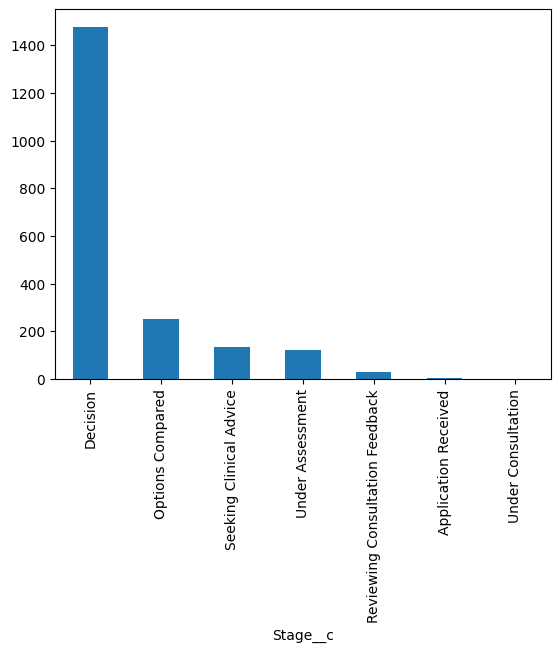

In [7]:
df.Stage__c.value_counts().plot.bar()

In [8]:
df[cols].to_excel("Pharmac applications.xlsx", index=False)

In [9]:
df["Days elapsed between application and last update"].describe()

count    2015.000000
mean     1390.057072
std      1372.478161
min       -94.000000
25%       485.000000
50%       866.000000
75%      1844.500000
max      9922.000000
Name: Days elapsed between application and last update, dtype: float64

<Axes: title={'center': 'Number of applications last updated per month'}, xlabel='Last Update date'>

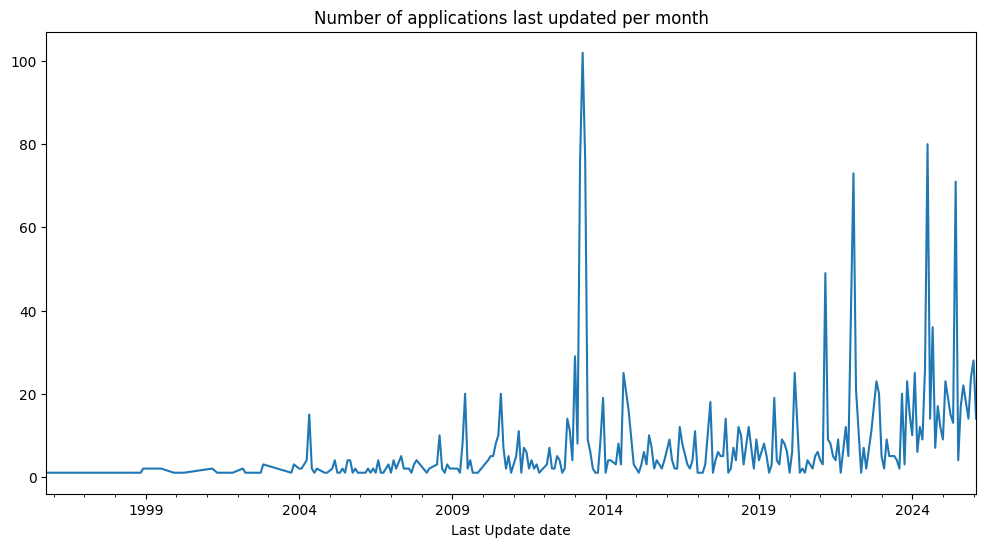

In [10]:
df["Last Update date"].groupby(df["Last Update date"].dt.to_period("M")).count().plot(figsize=(12, 6), title="Number of applications last updated per month")

<Axes: title={'center': 'Number of applications received per month'}, xlabel='Application Received date'>

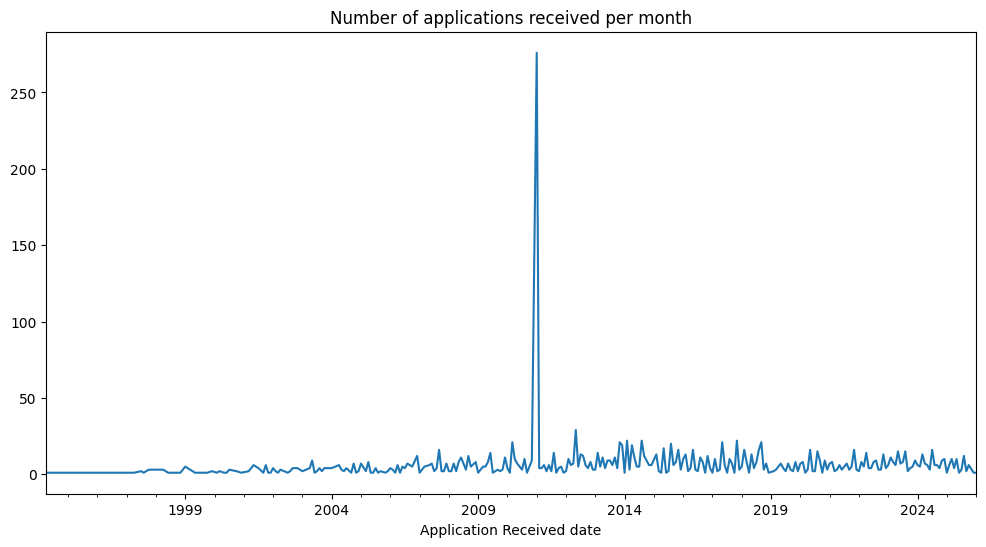

In [11]:
df["Application Received date"].groupby(df["Application Received date"].dt.to_period("M")).count().plot(figsize=(12, 6), title="Number of applications received per month")

In [12]:
df["Application Received date"].value_counts()

Application Received date
2011-01-01    276
2012-05-01     27
2014-08-01     21
2013-11-01     20
2010-03-01     18
             ... 
2016-11-08      1
2016-11-07      1
2016-11-01      1
2016-10-18      1
2026-01-14      1
Name: count, Length: 790, dtype: int64

In [13]:
df["Decision dates"].dropna().str.replace("Declined", "declined").str.replace("Approved", "approved").str.split("\r\n").apply(lambda x: x[-1].split(":")[1]).value_counts()

Decision dates
The funding application has been approved.        871
The funding application has been declined.        595
The funding application has been .                 11
The funding application has been out of scope.      3
The funding application is closed.                  1
Name: count, dtype: int64